# Corner and Shape Feature Extraction for Simple Image Analysis

### DCIT407 Semester Project — Group 21

## Abstract

This project implements a computer vision pipeline for detecting corners and extracting geometric shapes from images. Using Python and OpenCV, the system processes multiple images to identify key visual features, classify shapes, and analyze performance under noise. The goal is to demonstrate how feature extraction supports automated image analysis.

In [ ]:
# Install and import required libraries
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

%matplotlib inline

## 1. Image Acquisition

We upload multiple test images that will be analyzed automatically. These images form the dataset used for corner and shape detection.

In [ ]:
uploaded = files.upload()
image_files = list(uploaded.keys())

print("Images loaded:")
for f in image_files:
    print("-", f)

Saving building1.jpg to building1.jpg
Saving building2.jpg to building2.jpg
Saving building3.jpg to building3.jpg
Saving checker1.jpg to checker1.jpg
Saving checker2.jpg to checker2.jpg
Saving checker3.jpg to checker3.jpg
Saving grid1.jpg to grid1.jpg
Saving grid2.jpg to grid2.jpg
Saving grid3.jpg to grid3.jpg
Saving object1.jpg to object1.jpg
Saving object2.jpg to object2.jpg
Saving object3.jpg to object3.jpg
Saving shape1.jpg to shape1.jpg
Saving shape4.jpg to shape4.jpg
Saving shape5.jpg to shape5.jpg
Images loaded:
- building1.jpg
- building2.jpg
- building3.jpg
- checker1.jpg
- checker2.jpg
- checker3.jpg
- grid1.jpg
- grid2.jpg
- grid3.jpg
- object1.jpg
- object2.jpg
- object3.jpg
- shape1.jpg
- shape4.jpg
- shape5.jpg


## 2. Image Preprocessing

Images are converted to grayscale and smoothed using Gaussian blur. This step reduces noise and prepares the images for feature detection.


In [ ]:
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    return gray, blur


## 3. Corner Detection

The Harris corner detection algorithm identifies points where image intensity changes sharply in multiple directions.


In [ ]:
def detect_corners(gray):
    gray_float = np.float32(gray)
    corners = cv2.cornerHarris(gray_float, 2, 3, 0.04)
    return corners


## 4. Shape Classification

Contours are analyzed to classify shapes based on the number of edges detected. This enables automatic identification of triangles, rectangles, and circles.


In [ ]:
def classify_shape(contour):
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
    sides = len(approx)

    if sides == 3:
        return "Triangle"
    elif sides == 4:
        return "Rectangle"
    elif sides > 4:
        return "Circle"
    else:
        return "Unknown"


## 5. Image Analysis Pipeline

This function integrates preprocessing, corner detection, edge detection, and shape classification into a single automated pipeline.


In [ ]:
def analyze_image(filename):

    image = cv2.imread(filename)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    gray, blur = preprocess(image)

    # Corner detection
    corners = detect_corners(gray)
    corner_img = image_rgb.copy()
    corner_img[corners > 0.01 * corners.max()] = [255, 0, 0]

    # Edge detection
    edges = cv2.Canny(blur, 100, 200)

    # Contour detection
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    shape_img = image_rgb.copy()
    shape_count = 0

    for contour in contours:
        area = cv2.contourArea(contour)

        if area > 500:
            shape = classify_shape(contour)
            shape_count += 1

            cv2.drawContours(shape_img, [contour], -1, (0,255,0), 2)

            x, y, w, h = cv2.boundingRect(contour)
            cv2.putText(shape_img, shape, (x, y-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    corner_count = np.sum(corners > 0.01 * corners.max())

    return image_rgb, corner_img, edges, shape_img, corner_count, shape_count


## 6. Batch Image Processing

All uploaded images are processed automatically, and visual comparisons are displayed.


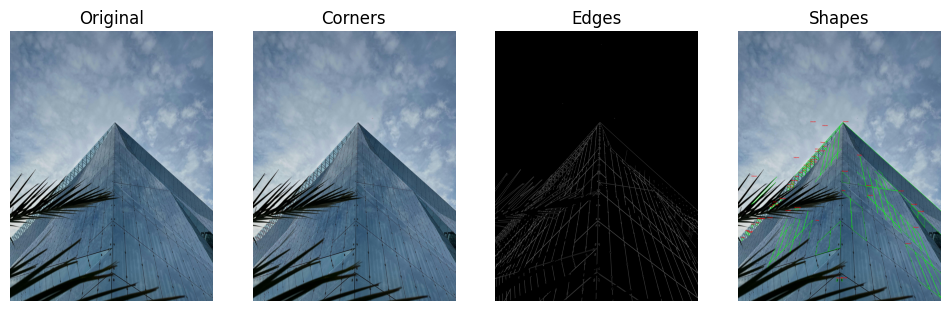

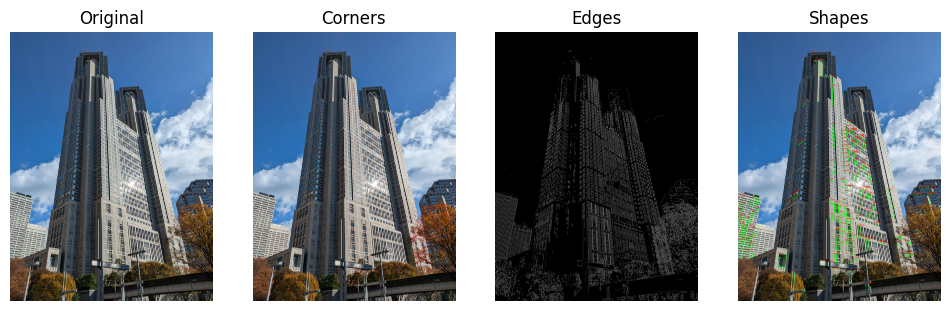

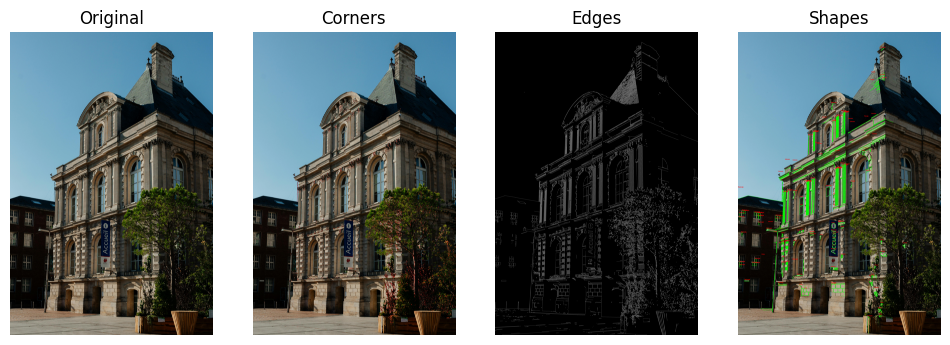

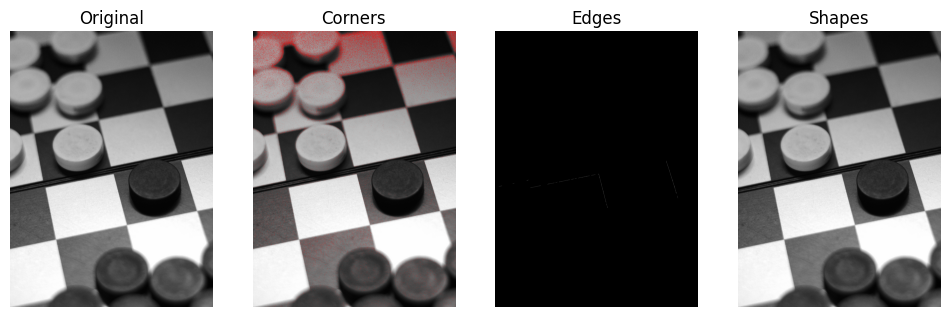

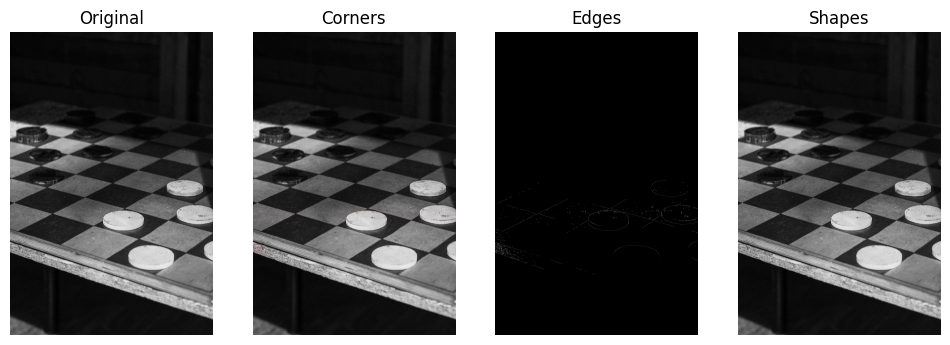

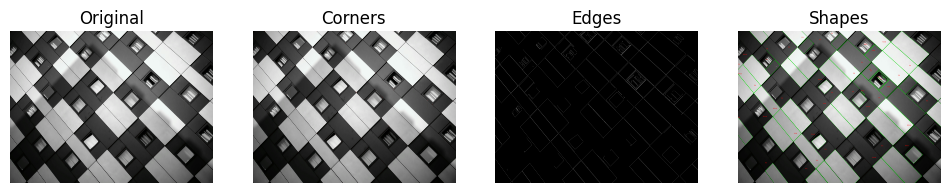

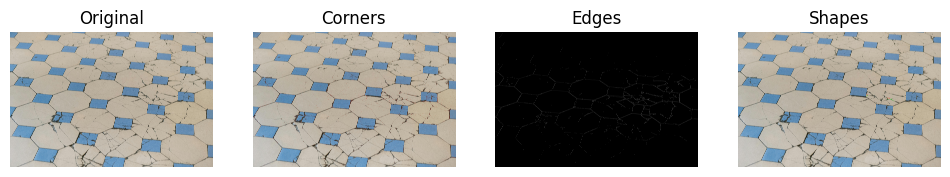

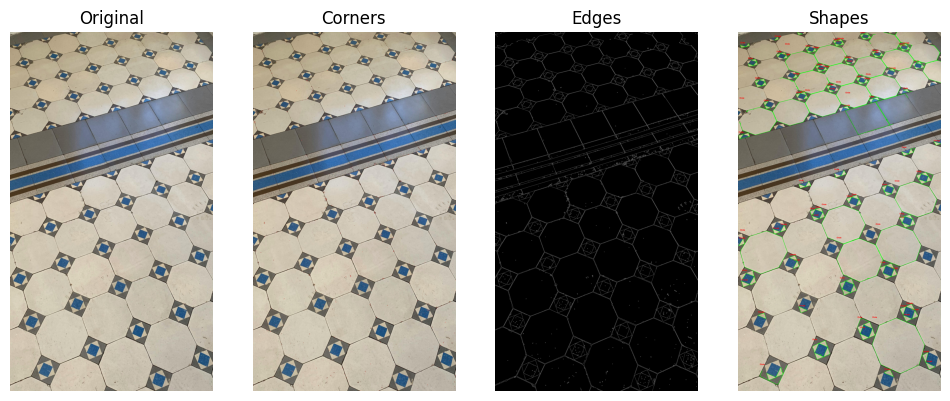

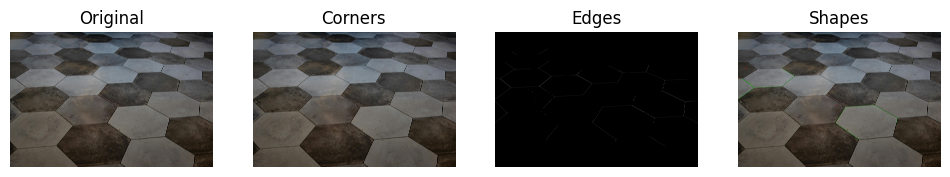

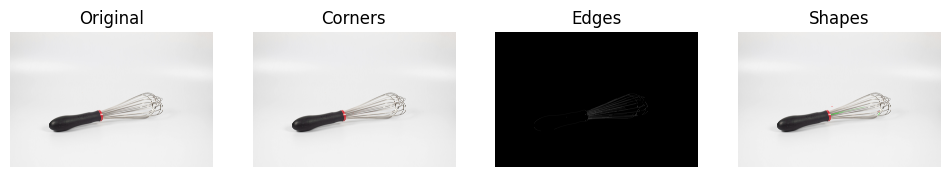

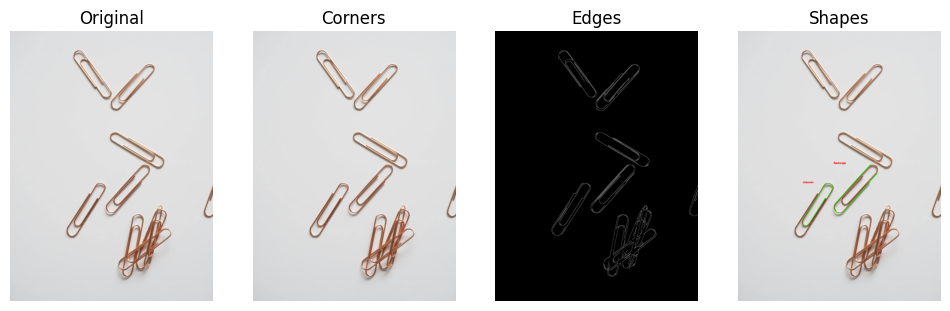

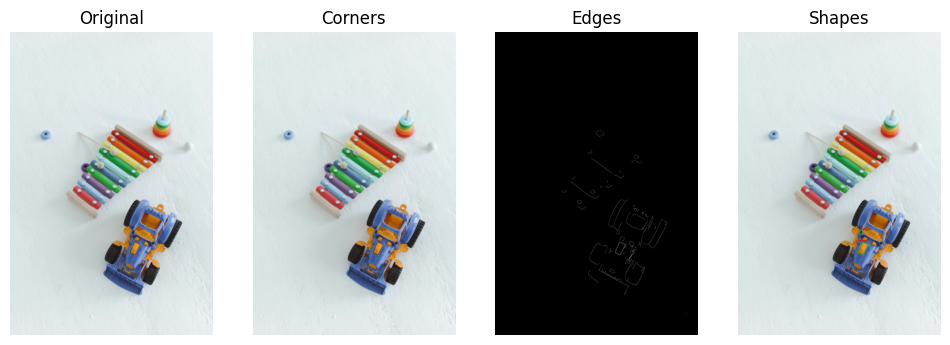

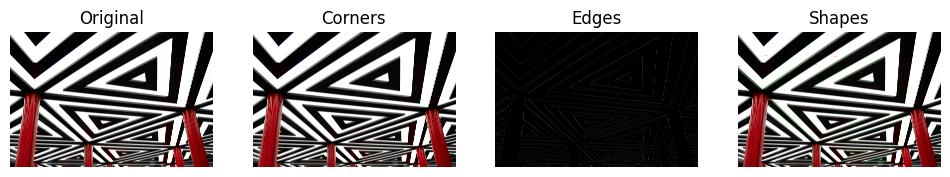

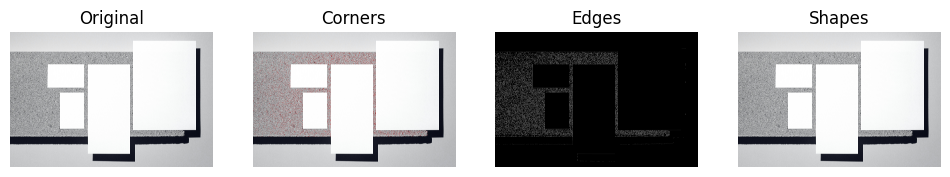

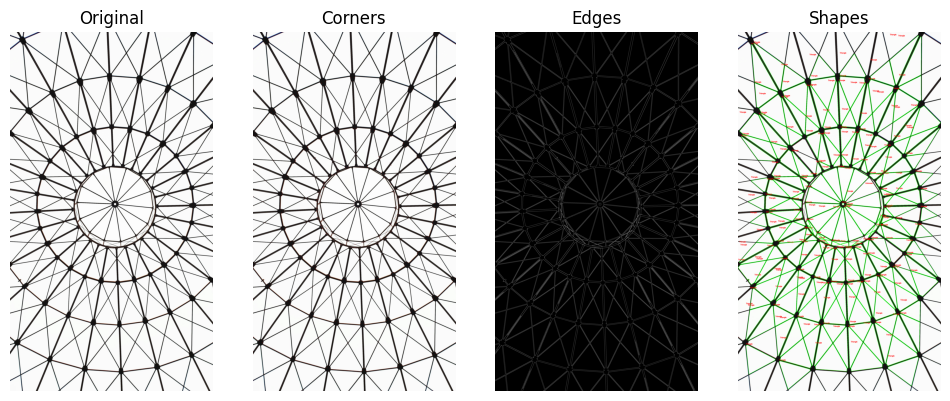

In [ ]:
results = []

for filename in image_files:

    original, corners, edges, shapes, corner_count, shape_count = analyze_image(filename)

    results.append((filename, corner_count, shape_count))

    plt.figure(figsize=(12,6))

    plt.subplot(1,4,1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(corners)
    plt.title("Corners")
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges")
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(shapes)
    plt.title("Shapes")
    plt.axis('off')

    plt.show()


## 7. Feature Statistics

Corner and shape counts are summarized to evaluate detection performance.


In [ ]:
print("=== Feature Summary ===\n")

for filename, corner_count, shape_count in results:
    print(f"{filename}")
    print("Corners detected:", corner_count)
    print("Shapes detected:", shape_count)
    print()


=== Feature Summary ===

building1.jpg
Corners detected: 7725
Shapes detected: 53

building2.jpg
Corners detected: 137044
Shapes detected: 203

building3.jpg
Corners detected: 104573
Shapes detected: 142

checker1.jpg
Corners detected: 451131
Shapes detected: 0

checker2.jpg
Corners detected: 10263
Shapes detected: 0

checker3.jpg
Corners detected: 2977
Shapes detected: 49

grid1.jpg
Corners detected: 85063
Shapes detected: 2

grid2.jpg
Corners detected: 9532
Shapes detected: 86

grid3.jpg
Corners detected: 353
Shapes detected: 3

object1.jpg
Corners detected: 1130
Shapes detected: 2

object2.jpg
Corners detected: 1012
Shapes detected: 2

object3.jpg
Corners detected: 1674
Shapes detected: 3

shape1.jpg
Corners detected: 2050
Shapes detected: 19

shape4.jpg
Corners detected: 249641
Shapes detected: 0

shape5.jpg
Corners detected: 6644
Shapes detected: 217



## 8. Noise Robustness Testing

Noise is added to evaluate system performance under degraded conditions.


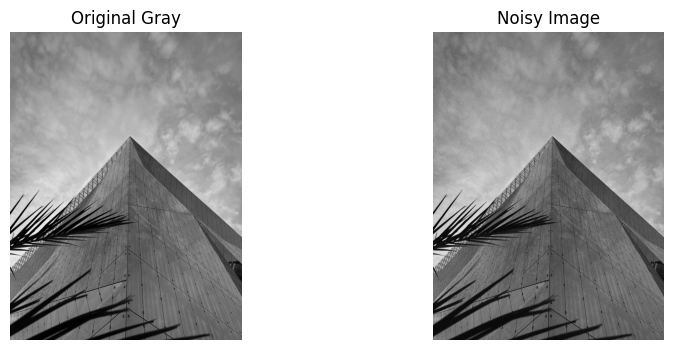

In [ ]:
def add_noise(gray):
    noise = np.random.normal(0, 25, gray.shape)
    noisy = gray + noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

filename = image_files[0]

image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

noisy = add_noise(gray)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.show()


## 9. Conclusion

This project demonstrates a complete computer vision pipeline for corner and shape feature extraction. The system successfully detects and classifies shapes across multiple images and highlights the importance of preprocessing and noise handling in image analysis.
